# Projeto 2 - Ciência dos Dados

Grupo: Guilherme Ricchetti Carvalho, Keiya Nishio, Lucas Gabriel Mocellin Teixeira e Matheus Marques Venturi.


Turma: C

### Importando bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Proposta

Classificar a comestibilidade (comestível ou venenoso) de um cogumelo com base em características morfológicas e ecológicas.

Dataset disponível no seguinte link: https://www.kaggle.com/uciml/mushroom-classification

**Obs**: este é o quarto notebook do projeto, e se propõe a explicar e aplicar a Regressão Logística.

In [2]:
import os

filename = 'mushrooms.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo mushrooms.csv, tudo certo para prosseguir com o projeto!


In [3]:
dataset=pd.read_csv(filename)
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#dataset=dataset.dropna()  # Remover linhas com colunas vazias (NaN)  -- não precisou

### Tradução do dataset para português

Nas próximas duas células, foi feita uma adaptação do dataset para a língua portuguesa, de modo a permitir uma melhor interpretação dos dados.

In [5]:
dataset = dataset.rename(columns = 
                     {'class': 'classe',
                      'cap-shape': 'formato-chapéu', 
                      'cap-surface': 'superfície-chapéu',
                      'cap-color': 'cor-chapéu',
                      'bruises': 'hematomas',
                      'odor': 'odor',
                      'gill-attachment': 'ligação-lamela',
                      'gill-spacing': 'espaçamento-lamela',
                      'gill-size': 'tamanho-lamela',
                      'gill-color': 'cor-lamela',
                      'stalk-shape': 'formato-estipe',
                      'stalk-root': 'raiz-estipe',
                      'stalk-surface-above-ring': 'superfície-estipe-sobre-anel',
                      'stalk-surface-below-ring': 'superfície-estipe-sob-anel',
                      'stalk-color-above-ring': 'cor-estipe-sobre-anel',
                      'stalk-color-below-ring': 'cor-estipe-sob-anel',
                      'veil-type': 'tipo-volva',
                      'veil-color': 'cor-volva',
                      'ring-number': 'quantidade-anéis',
                      'ring-type': 'tipo-anel',
                      'spore-print-color': 'cor-impressão-esporo',
                      'population': 'população',
                      'habitat': 'habitat'}, inplace = False)

In [6]:
dataset['classe']=dataset['classe'].astype('category')
dataset['classe'].cat.categories = ['comestível', 'venenoso']

dataset['formato-chapéu']=dataset['formato-chapéu'].astype('category')
dataset['formato-chapéu'].cat.categories = ['sino', 'cone', 'reto', 'nodoso', 'afundado', 'convexo']

dataset['superfície-chapéu']=dataset['superfície-chapéu'].astype('category')
dataset['superfície-chapéu'].cat.categories = ['fibroso', 'ranhuras', 'liso', 'escamoso']
 
dataset['cor-chapéu']=dataset['cor-chapéu'].astype('category')
dataset['cor-chapéu'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'rosa', 'verde', 'roxo', 'branco', 'amarelo']

dataset['hematomas']=dataset['hematomas'].astype('category')
dataset['hematomas'].cat.categories = ['não tem' , 'tem']

dataset['odor']=dataset['odor'].astype('category')
dataset['odor'].cat.categories = ['amêndoa', 'creosote', 'podre', 'anis', 'mofado', 'nenhum', 'pungente', 'picante', 'peixe']

dataset['ligação-lamela']=dataset['ligação-lamela'].astype('category')
dataset['ligação-lamela'].cat.categories = ['conectada', 'solta']

dataset['espaçamento-lamela']=dataset['espaçamento-lamela'].astype('category')
dataset['espaçamento-lamela'].cat.categories = ['perto', 'lotado']

dataset['tamanho-lamela']=dataset['tamanho-lamela'].astype('category')
dataset['tamanho-lamela'].cat.categories = ['ampla', 'estreita']

dataset['cor-lamela']=dataset['cor-lamela'].astype('category')
dataset['cor-lamela'].cat.categories = ['couro', 'vermelha', 'cinza', 'chocolate', 'preta', 'marrom', 'laranja', 'rosa', 'verde', 'roxa', 'branca', 'amarelo']

dataset['formato-estipe']=dataset['formato-estipe'].astype('category')
dataset['formato-estipe'].cat.categories = ['alargando', 'afunilando']
    
dataset['raiz-estipe']=dataset['raiz-estipe'].astype('category')
dataset['raiz-estipe'].cat.categories = ['não tem', 'bulboso', 'clava', 'reto', 'enraizado']

dataset['superfície-estipe-sobre-anel']=dataset['superfície-estipe-sobre-anel'].astype('category')
dataset['superfície-estipe-sobre-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['superfície-estipe-sob-anel']=dataset['superfície-estipe-sob-anel'].astype('category')
dataset['superfície-estipe-sob-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['cor-estipe-sobre-anel']=dataset['cor-estipe-sobre-anel'].astype('category')
dataset['cor-estipe-sobre-anel'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['cor-estipe-sob-anel']=dataset['cor-estipe-sob-anel'].astype('category')
dataset['cor-estipe-sob-anel']. cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['tipo-volva']=dataset['tipo-volva'].astype('category')
dataset['tipo-volva'].cat.categories = ['parcial']

dataset['cor-volva']=dataset['cor-volva'].astype('category')
dataset['cor-volva'].cat.categories = ['marrom' , 'laranja', 'branco', 'amarelo']

dataset['quantidade-anéis']=dataset['quantidade-anéis'].astype('category')
dataset['quantidade-anéis'].cat.categories = ['nenhum' , 'um', 'dois']

dataset['tipo-anel']=dataset['tipo-anel'].astype('category')
dataset['tipo-anel'].cat.categories = ['evanescente', 'deslumbrante', 'grande', 'nenhum', 'pingente']

dataset['cor-impressão-esporo']=dataset['cor-impressão-esporo'].astype('category')
dataset['cor-impressão-esporo'].cat.categories = ['couro', 'chocolate', 'preto', 'marrom', 'laranja', 'verde', 'roxo', 'branco', 'amarelo']

dataset['população']=dataset['população'].astype('category')
dataset['população'].cat.categories=['abundante', 'aglomerado', 'numeroso', 'espalhado', 'diverso', 'solitário']

dataset['habitat']=dataset['habitat'].astype('category')
dataset['habitat'].cat.categories=['madeira', 'gramínea', 'folha', 'pradaria', 'trilha', 'urbano', 'lixo']

Para poder aferir a performance do classificador, é necessário separar a base de dados em duas: treinamento e teste. Essa separação foi feita numa proporção de 3:1, ou seja, 25% Teste e 75% Treinamento.

Obs.: o atributo random_state deve ser igualado a 1 para impedir que, a cada vez que o código é rodado, seja feita uma divisão entre Treinamento e Teste diferente. Isso garante que o classificador também seja sempre o mesmo.

In [7]:
train, test = train_test_split(dataset, test_size=0.25, random_state=1)  # separar dataset em treinamento e teste

# Classificador Regressão Logística

Esta seção é destinada à aplicação do modelo de classificação Regressao Logistica.
Esse modelo utiliza a base treinamento (separada a partir do dataset) para prever a classe de um dado cogumelo.

**Motivação**: esse modelo de regressão será utilizado para variar um pouco os métodos de classificação. Diferentemente das árvores de decisão, a regressão log;istica se baseia em métodos bastante diferentes, tendo uma interseção maior com inferência estatística e possibilitando uma melhor análise de sua performance.

### Funcionamento do Classificador

Como os outros classificadores, a regressão logística serve para classificar dados observados com base em algumas características (features). Esse método de classificação utiliza apenas as features relevantes, a quais também devem ser independentes entre si.

A regressão logística, dfierente da linear, faz uma classificação binária (0 e 1), o que se encaixa na proposta de classificação dos cogumelos. O confinamento das previsões em 0 e 1 é possível pois o gráfico da classificação em função da probabilidade é em formato de S, conforme a figura abaixo: 

<img src=img/grafico_S_1.png width=40%>

Diferente de uma regressão linear, que prevê um valor de saída para o modelo, a regressão logística prevê os "log-odds" do nosso Y. Os "log-odds" são calculados por meio da divisão da probabilidade de um evento (chamado de "p") por seu complemento (1 - p). Por fim, retira-se o logaritmo natural ("ln") dessa divisão. O que tornam os "log-odds" diferentes é que, dissemelhante a probabilidades e valores discretos de uma variável dicotômica, eles são medidos em uma escala contínua.
 
<img src=img/formula_p.jpeg width=20%>

Na fórmula acima, está sendo feita a conversão de "log-odds" para uma probabilidade. Onde o número de euler está elevado ao resultado de nossos "log-odds" (alpha representa o intercepto, e beta, o peso da regressão). Assim, ao plotar o gráfico, consegue-se a linha curva (em formato de "S") que fica parcialmente confinada aos valores 1 e 0.

<img src=img/grafico_S.jpeg width=40%>

Neste gráfico, pode-se notar que, para valores de X maiores que 1.95, a probabilidade prevista para Y é maior que 0.5, e assim, classificados como 1 (e menores que 1,95 serão classificados 0).

A divisão do gráfico em 4 setores serve para representar as previsões corretas (verdadeiros positivos e verdadeiros negativos) e as incorretas (falsos positivos e falsos negativos). Essa divisião é feita com base na probabilidade de P(Y=1) = 0.5, que é o pico de indecisão. Traça-se, então, uma linha horizontal cruzando o 0.5 e uma vertical que cruze a curva S.

### Vantagens e Desvantagens

**Vantagens**: a regressão logística permite uma previsão com base em probabilidades obtidas por meio da análise de diversas variáveis. Ela também permite uma análise estatística mais completa, com teste de hipóteses por coeficientes e valor-p e análise de relevância de cada variável.

**Desvantagens**: é uma técnica mais complexa e com bastante detalhes, sendo um potencial empecilho para a compreensão aprodundada da classificação.

### Aplicação da Regressão com SciKit Learn

Nesta seção, será devidamente aplicada a Regressão Logística. Ao longo da aplicação, serão explicadas as razões por trás de cada código, bem como o funcionamento da biblioteca sklearn.tree, utilizada para fazer o modelo.

### Preparando os dados de treinamento:

Assim como nos Notebooks anteriores, é preciso preparar os dados, transformando-os em dummies e separando a base de treinamento de target (Y) e features (X). O processo é igual ao realizado nos notebook 2 e 3.

In [8]:
colunas_feature = list(train.columns)
colunas_feature.remove('classe')

In [9]:
X = train.loc[:, colunas_feature]
X = pd.get_dummies(X)
X.head(3)

,formato-chapéu_sino,formato-chapéu_cone,formato-chapéu_reto,formato-chapéu_nodoso,formato-chapéu_afundado,formato-chapéu_convexo,superfície-chapéu_fibroso,superfície-chapéu_ranhuras,superfície-chapéu_liso,superfície-chapéu_escamoso,...,população_espalhado,população_diverso,população_solitário,habitat_madeira,habitat_gramínea,habitat_folha,habitat_pradaria,habitat_trilha,habitat_urbano,habitat_lixo
6253,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2739,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
7436,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [10]:
train.loc[train['classe']=='venenoso', 'y'] = 1
train.loc[train['classe']=='comestível', 'y'] = 0
y=train.loc[:, 'y']
y.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


6253    1.0
2739    0.0
7436    1.0
Name: y, dtype: float64

### Criando o modelo:

Com os dados devidamente preparados, é possível aplicar a Regressão Logística. Para isso, basta importar as bibliotecas do SciKit Learn necessárias e aplicar o código "fit" nas variáveis X (features) e y (target) preparadas no item anterior.

Vale ressaltar que, para o atributo "random_state" do código abaixo, foi dado o valor 1 de modo a impedir que os coeficientes das features, determinados pela regressão logística, variem cada vez que o código seja rodado.

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1).fit(X, y)

## Testando a performance do modelo

Novamente, não basta apenas o classificador funcionando, é preciso avaliar sua acurácia. Para isso, serão utilizados métodos semelhantes aos utilizados no notebook anterior e mais um adicional, específico para esse tipo de regressão.

#### Teste de Underfitting

In [12]:
score_treinamento=clf.score(X, y)
print('O score do classificador quando aplicado à própria base de treinamento é de {}%. Logo, não há underfitting.'.format(score_treinamento*100))

O score do classificador quando aplicado à própria base de treinamento é de 99.98358772361726%. Logo, não há underfitting.


#### Teste de Overfitting

Será preciso preparar a base de testes da mesma forma que a base de treinamento, ou seja: transformar variáveis em dummies e separarar a base em X e Y.

In [13]:
X_test = test.loc[:, colunas_feature]
X_test = pd.get_dummies(X_test)
X_test.head(3)

,formato-chapéu_sino,formato-chapéu_cone,formato-chapéu_reto,formato-chapéu_nodoso,formato-chapéu_afundado,formato-chapéu_convexo,superfície-chapéu_fibroso,superfície-chapéu_ranhuras,superfície-chapéu_liso,superfície-chapéu_escamoso,...,população_espalhado,população_diverso,população_solitário,habitat_madeira,habitat_gramínea,habitat_folha,habitat_pradaria,habitat_trilha,habitat_urbano,habitat_lixo
1392,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4051,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3725,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [14]:
test.loc[test['classe']=='venenoso', 'y_test']=1
test.loc[test['classe']=='comestível', 'y_test']=0
y_test=test.loc[:, 'y_test']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Na célula abaixo, obtém-se o score do modelo quando aplicado à base de testes:

In [15]:
score_teste=clf.score(X_test, y_test)
print('O score do classificador quando aplicado à base de teste é de {}%. Logo, não há overfitting.'.format(score_teste*100))

O score do classificador quando aplicado à base de teste é de 99.85228951255539%. Logo, não há overfitting.


#### Validação Cruzada

O teste da validação cruzada é feito aqui da mesma forma que foi feito nos notebooks 2 e 3.

In [16]:
from sklearn.model_selection import cross_val_score

X_cross = dataset.loc[:, colunas_feature]
X_cross = pd.get_dummies(X_cross)

dataset.loc[dataset['classe']=='venenoso', 'y_cross'] = 1
dataset.loc[dataset['classe']=='comestível', 'y_cross'] = 0
y_cross=dataset.loc[:, 'y_cross']

clf.fit(X_cross, y_cross)

score_medio=cross_val_score(clf, X_cross, y_cross, cv=10).mean()  # rodando a validação cruzada 10 vezes (cv=10) e obtendo a média
print('O score médio da validação cruzada é {}%. Pode-se afirmar que a performance do classificador é alta.'.format((score_medio*100).round(2)))

O score médio da validação cruzada é 96.78%. Pode-se afirmar que a performance do classificador é alta.


#### Matriz de Confusão

A matriz de confusão é outra forma interessante de avaliar a precisão do modelo de Regressão Logística. Essa matriz mostra lado a lado os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. Permitindo prever quantas previsões o modelo errou.

Na célula abaixo, gera-s e uma matriz de confusão simples com o metrics da biblioteca SciKit Learn:

In [17]:
from sklearn import metrics

predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1020    0]
 [   0 1011]]


#### Com a biblioteca Seaborn

Na célula abaixo, utiliza-se a biblioteca Seaborn para gerar uma matriz de confusão um pouco mais visual.

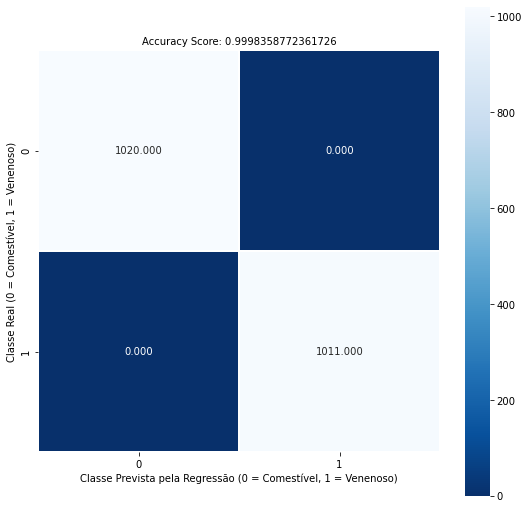

In [20]:
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Classe Real (0 = Comestível, 1 = Venenoso)');
plt.xlabel('Classe Prevista pela Regressão (0 = Comestível, 1 = Venenoso)');
all_sample_title = 'Accuracy Score: {0}'.format(score_treinamento)
plt.title(all_sample_title, size = 10);

A matriz de confusão permite concluir que não houve erros de previsão.

### Features Mais Importantes

Na célula abaixo, serão determinadas as features mais relevantes para a classificação. Na regressão logística, quanto mais longe de 0 o coeficiente da variável estiver, mais relevante ela é para a classificação dos cogumelos.

In [21]:
coef = pd.DataFrame(data={'nomes': X.columns, 'coeficientes': abs(clf.coef_[0])})
ordem = coef.sort_values('coeficientes', ascending=False)
ordem.head(5)

,nomes,coeficientes
27,odor_nenhum,4.182368
100,cor-impressão-esporo_verde,3.660984
25,odor_anis,2.955707
22,odor_amêndoa,2.955707
23,odor_creosote,2.872201


Também vale dar uma olhada nas variáveis menos relevantes:

In [ ]:
ordem.tail(5)

## Regressão Logística com a Biblioteca "Statsmodels"

Tentou-se aplicar a Regressão Logística com a biblioteca Statsmodels, que é mais completa em termos estatísticos, permitindo avaliar teste de hipóteses com valor-p. No entanto, não se obtiveram bons resultados devido a um erro que não se soube resolver.

In [ ]:
import statsmodels.api as sm
logit = sm.Logit(y,X)
result = logit.fit(method='bfgs')
result.summary()

## Conclusão

Após uma análise exploratória, aplicação de três classificadores e aferição de suas perfomances, pode-se finalizar este projeto com algumas conclusões. Uma delas é a de que a previsão da classe de um cogumelo a partir da base de dados Mushrooms (utilizada neste projeto) apresenta alta performance, caso seja aplicado qualquer método de classificação entre os 3 utilizados neste projeto. Porém, isso não significa que se pode confiar plenamente nessa classificação, pois a base de dados representa apenas uma amostra da população. Mas apesar disso, os resultados desse projeto podem ser significativos para o ramo da epidemiologia, uma vez que permite classificar um cogumelo desconhecido com base em suas características morfológicas e ecológicas. 

É interessante dar atenção às características mais relevantes determinadas pelos classificadores. Pode-se perceber que a feature "odor_nenhum" foi classificada como a mais relevante nos três classificadores. Provavelmente essa é de fato uma boa característica para iniciar a classificação de um cogumelo desconhecido.

Outro fenômeno notável foi o seguinte: certas features que apresentavam o problema da probabilidade 100% (conforme definido na Análise Exploratória) foram utilizadas pela Decision Tree, o que pode ser visualizado na árvore de decisão plotada no Notebook 2. No entanto, essas features foram utilizadas no final dos ramos, classificando a última sub-amostra.

Por fim, sempre é válido promover uma reflexão acerca do que poderia ser melhorado no projeto. Um dos pontos com potencial de aperfeiçoamento é a utilização efetiva da regressão logística com a biblioteca StatsModels. Isso permitiria uma análise mais completa desse método de classificação, pois permitiria avaliar os resultados com maior arcabouço estatístico. Também, de modo a mitigar a possibilidade de o dataset utilizado ser limitado, poder-se-ia utilizar mais uma base de dados. E, um terceiro e final ponto interessante, seria fazer a aplicação de mais classificadores que utilizam métodos diferentes, o que expandiria a diversidade do projeto.

## Referências

Esses artigos foram usados para a compreensão, e explicação do modelo de regressão, desde de teoria, até a aplicação no python:
- https://levelup.gitconnected.com/an-introduction-to-logistic-regression-in-python-with-statsmodels-and-scikit-learn-1a1fb5ce1c13

- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Biblioteca SciKit Learn para aplicação do modelo de Regressão Logística
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Artigo que recomenda alguns métodos de análise de performance:
- https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-est%C3%A1-funcionando-mesmo-a5892f6468b

Artigo que ensina a gerar Matriz de Confusão:
- https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

Artigo que explica sobre Overfitting e Underfitting:
- https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/